## Exemplo - Classificação

Neste notebook veremos como funciona a construção de um modelo preditivo do início ao fim. Resolveremos o problema de negócio usando técnicas de classificação.

Definição do problema: Construir um modelo para prever através dos dados retornados por um sonar, se o objeto é metal ou rocha. Cada padrão possui 60 números no range de 0 a 1 e cada número representa a energia na partícula de frequência retornada pelo sonar, durante um período de tempo. Os labels associados são R (para rocha ou rock em inglês) e M (para metal).

Atributos:

Este dataset não possui documentação sobre os atributos (o que traz desafio adicional no processo de análise). Mais informações sobre o dataset podem ser obtidas aqui:
* https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks) e aqui:
* https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.names

## Importando os Módulos

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from pandas import read_csv
#from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Carregando os Dados

In [8]:
# Carregando os dados
path = "data/sonar.csv"
dados = read_csv(path, header = None)

## Sumarizando os Dados

In [9]:
# Estatística Descritiva

# Shape
print(dados.shape)

# Tipos de Dados
print(dados.dtypes)

# Head (primeiras linhas do arquivo)
print(dados.head(20))

# Definindo precisão de 3 casas decimais para o describe dos dados
#set_option('precision', 3)
print(dados.describe())

(208, 61)
0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object
        0       1       2       3       4       5       6       7       8   \
0   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1   0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2   0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3   0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4   0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5   0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6   0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7   0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8   0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9   0.0164  0.0173  0.0347  0.

In [10]:
# Distribuição das classes
print(dados.groupby(60).size())

60
M    111
R     97
dtype: int64


## Visualização de Dados

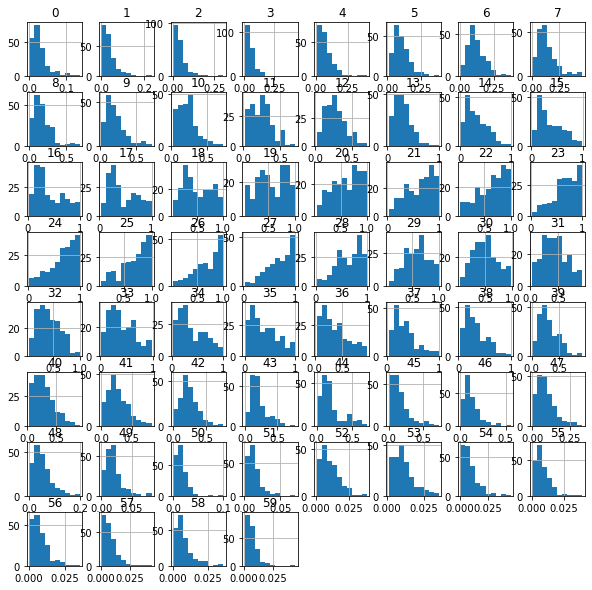

In [12]:
# Histogramas
plt.rcParams["figure.figsize"] = (10,10)
dados.hist()
plt.show()

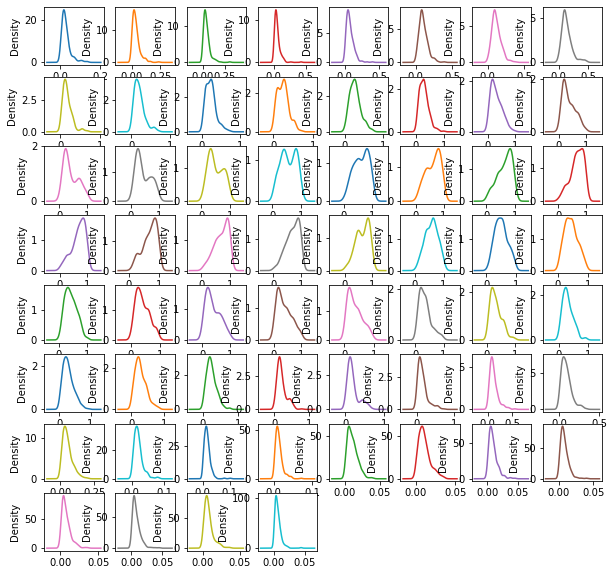

In [13]:
# Density Plots
dados.plot(kind = 'density', subplots = True, layout = (8,8), sharex = False, legend = False)
plt.show()

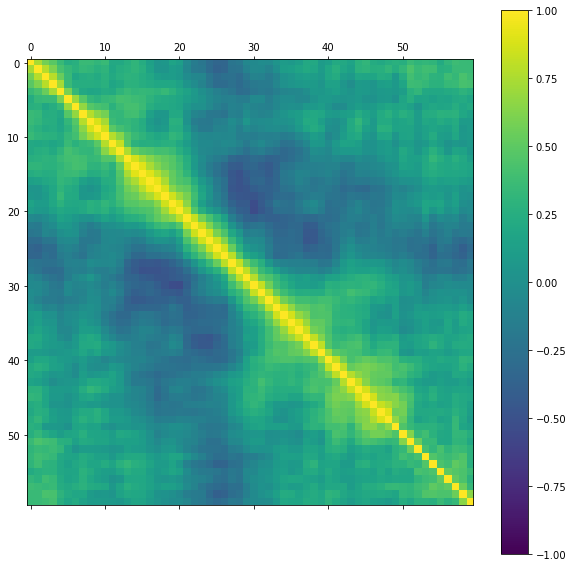

In [14]:
# Matriz de Correlação
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dados.corr(), vmin = -1, vmax = 1, interpolation = 'none')
fig.colorbar(cax)
plt.show()

## Preparação dos Dados

In [18]:
# Separação em Dados de Treino e Teste
valores_dados = dados.values

# Variáveis independentes
X = valores_dados[:,0:60].astype(float)

# Variável dependente
Y = valores_dados[:,60]

# Conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.20, random_state = 7)

## Avaliação do Algoritmo

In [22]:
# Criando modelo de Machine Leanring a partir de cada algoritmo
# Vamos utilizar como métrica a acurácia. Quanto maior o valor, melhor.
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in modelos:
    kfold = KFold(n_splits = 10, shuffle=True, random_state = 7)
    cross_val_result = cross_val_score(modelo, X_treino, Y_treino, cv = kfold, scoring = 'accuracy')
    
    resultados.append(cross_val_result)
    nomes.append(nome)
    
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

LR: 0.777574 (0.088423)
LDA: 0.778676 (0.093570)
KNN: 0.758824 (0.106417)
CART: 0.697059 (0.123905)
NB: 0.682721 (0.136040)
SVM: 0.765074 (0.087519)


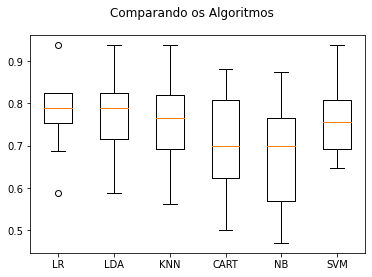

In [23]:
# De acordo com os resultados anteriores, os modelos criados com Regressão Logística, Análise do discriminante e SVM apresentaram 
# os melhores valores de acurácia e portanto os melhores resultados.
# Isso pode ser confirmado, comparando os algoritmos através de boxplots.
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [24]:
# Os dados estão em diferentes escalas e isso pode estar prejudicando a performance de alguns algoritmos.
# Vamos avaliar novamente os algoritmos, mas agora padronizando os dados (colocando-os na mesma escala).
# Aplicando Padronização ao conjunto de dados
# Nesta técnica, os dados serão transformados de modo que estejam com uma distribuição normal, com média igual a zero e
# desvio padrão igual a 1.
pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('Scaled-LDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in pipelines:
    kfold = KFold(n_splits = 10, shuffle=True, random_state = 7)
    cross_val_result = cross_val_score(modelo, X_treino, Y_treino, cv = kfold, scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-LR: 0.754412 (0.067926)
Scaled-LDA: 0.778676 (0.093570)
Scaled-KNN: 0.808456 (0.107996)
Scaled-CART: 0.710662 (0.083821)
Scaled-NB: 0.682721 (0.136040)
Scaled-SVM: 0.826103 (0.081814)


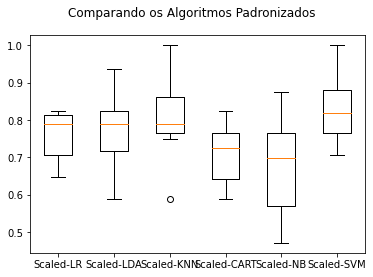

In [25]:
# Nos resultdados anteriores, podemos perceber que a padronização gerou um efeito no modelo criado com algoritmo KNN,
# reduzindo as taxa de erros e também no modelo criado com SVM.
# Comparando os algoritmos
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

## Tuning dos Modelos criados com KNN e SVM

In [33]:
# Embora o KNN tenha apresentado a menor taxa de erro após a padronização dos dados, podemos ainda otimizá-lo
# com o ajuste dos parâmetros.

# Definindo a escala
scaler = StandardScaler().fit(X_treino)
rescaledX = scaler.transform(X_treino)

# Ajustando valores para o tamanho do K
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
valores_grid = dict(n_neighbors = neighbors)

# Criando o modelo
modelo = KNeighborsClassifier()

# Definindo K
kfold = KFold(n_splits = 10, shuffle=True, random_state = 7)

# Testando diferenets combinações com os valores de K
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid, cv = kfold, scoring = 'accuracy')
grid_result = grid.fit(rescaledX, Y_treino)

# Printo do resultado
# ***********************
# De acordo com o resultado, o melhor valor de k é 1. Com isso alcançamos uma acurácia de 0.84, o melhor até agora.
# ***********************
print("Melhor Acurácia: %f utilizando %s" % (grid_result.best_score_, grid_result.best_params_))

Melhor Acurácia: 0.836029 utilizando {'n_neighbors': 1}


In [34]:
# Vamos agora ajustar os parâmeros do SVM.

# Definindo a escala
scaler = StandardScaler().fit(X_treino)
rescaledX = scaler.transform(X_treino)

# Ajustando os parâmetros do SVM:
# c_values - indica o nível das margens dos vector machines
# kernel_values - tipos de kernel usados no SVM
# Faremos diferenets combinações desses métodos, a fim de verificar qual é a melhor combinação.
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
valores_grid = dict(C = c_values, kernel = kernel_values)

# Criando o modelo
modelo = SVC()

# Definindo K
kfold = KFold(n_splits = 10, shuffle=True, random_state = 7)

# Testando diferenets combinações com os parâmetros
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid, cv = kfold, scoring = 'accuracy')
grid_result = grid.fit(rescaledX, Y_treino)

# Printo do resultado
# ***********************
# De acordo com o resultado, o melhor valor de C é 1.5 com kernel'rbf'. 
# Com isso alcançamos uma acurácia de 0.867, a melhor até agora.
# ***********************
print("Melhor Acurácia: %f utilizando %s" % (grid_result.best_score_, grid_result.best_params_))

Melhor Acurácia: 0.850000 utilizando {'C': 1.7, 'kernel': 'rbf'}


## Utilizando Métodos Ensemble

In [36]:
# *************** Dependendo do seu computador esta célula pode levar alguns minutos para ser executada **********

# Métodos Ensemble são outra forma de otimizar o modelo preditivo. Vamos utilizar aqui:
# Metodos Bagging - RandomForest e Extra Trees
# Métodos Boosting - AdaBoost e Gradient Boosting 

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in ensembles:
    kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)
    cross_val_result = cross_val_score(modelo, X_treino, Y_treino, cv = kfold, scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

AB: 0.782721 (0.072445)
GBM: 0.808088 (0.120841)
RF: 0.795588 (0.069953)
ET: 0.843750 (0.073092)


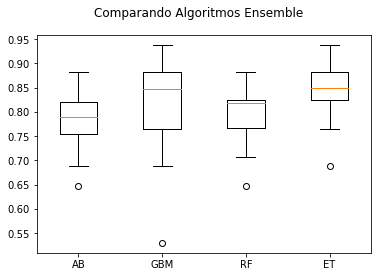

In [37]:
# **** Lembre-se: Cada algoritmo espera receber os dados em um formato/escala específicos e diversas variações ****
# **** no dataset podem ser necessárias até que se consiga o modelo ideal. ****

# Podemos ver que o Gradient Boosting  apresentou a melhor acurácia e portanto a menor taxa de erro.
# Vamos comprovar isso comparando os modelos criados com esses algoritmos
fig = plt.figure()
fig.suptitle('Comparando Algoritmos Ensemble')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

## Finalizando o Modelo

O modelo criado com SVM apresentou a melhor acurária entre todos os modelos criados e portanto será usado na construção da versão final do modelo preditivo.

In [38]:
# Preparando a versão final do modelo
scaler = StandardScaler().fit(X_treino)
rescaledX = scaler.transform(X_treino)
modelo = SVC(C = 1.5)
modelo.fit(rescaledX, Y_treino)

SVC(C=1.5)

In [39]:
# Aplicando o modelo aos dados de teste
rescaledValidationX = scaler.transform(X_teste)
previsoes = modelo.predict(rescaledValidationX)

# A acurácia ficou em 0.857, muito próximo do que conseguimos nos dados de treino
print(accuracy_score(Y_teste, previsoes))
print(confusion_matrix(Y_teste, previsoes))
print(classification_report(Y_teste, previsoes))

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42

